# Linear Classification with Numpy

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import ones
from numpy import zeros

## Step 1: Load Data

Let's create some data

In [16]:
N = 100
D = 2

X = np.random.randn(N,D)

In [17]:
X[:50, :] = X[:50, :] + 2 * np.ones((50,2))
X[50:, :] = X[50:, :] - 2 * np.ones((50,2))

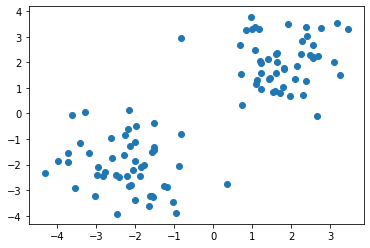

In [18]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [19]:
y = np.concatenate((np.zeros(50), np.ones(50)), axis = 0)  

## Step 2: Build the model

We are creating linear classification model.  

From a linear line $y = mx + b$, rewrite it to $w_1x_1 + w_2x_2 + b = 0$, where $x_1 = x, x_2=y$.  

Let $a = w_1x_1 + w_2x_2 + b$.

If $a \geq 0$, then assign $1$. 

If $a < 0$, then assign $0$. 

And a predicted value $\hat{y} = \sigma (a)$, where $\sigma$ is a sigmoid function, $$ \hat{y} = \sigma(a) = \frac{1}{1+e^{-a}}$$. 

Loss function that we want to minimize is $\textbf{binary cross entropy}$ function $L$, that is
$$ L = -\frac{1}{N} \sum_{i=1}^N \{y_i \log \hat{y}_i + (1-y_i) \log(1-\hat{y}_i) \}$$ 

Now take derivative of $L$ respect to each $w_i$, then $$ \frac{\partial L}{\partial w_j} = \frac{1}{N}\sum_{i=1}^N (\hat{y}_i -y_i)x_{ij}  $$
and $$ \frac{\partial L}{\partial b} = \frac{1}{N} \sum_{i=1}^N (\hat{y}_i -y_i)  $$

Once we have these informations, we can run gradient descent $W = W - \eta \nabla L$ to minimize our loss function $L$.  

In [20]:
def sigmoid(a):
    sig = 1 / (1 + np.exp(-a))
    return sig

In [21]:
def model(X,y):   
    w1 = 0 
    w2 = 0 
    b = 0 

    lr = 0.0001
    epochs = 1000

    N = float(len(X))

    for i in range(epochs):
        a = w1 * X[:, 0] + w2 * X[:,1] + b
        yhat = sigmoid(a)
        Lw1 = (1/N)*sum(yhat - y * X[:, 0])
        Lw2 = (1/N)*sum(yhat - y * X[:, 1])
        Lb = (1/N)*sum(yhat - y)
        w1 = w1 - lr * Lw1
        w2 = w2 - lr * Lw2
        b = b - lr * Lb

    return w1, w2, b

## Step 3: Train model

In [22]:
model(X,y)

(-0.1618238176907024, -0.1523527830565012, -0.0004215502425485764)

So, it returend the coefficients $w_1, w_2, b$. 

## Step 4: Evaluate the model

In [23]:
w1 = model(X,y)[0]
w2 = model(X,y)[1]
b = model(X,y)[2]

print(w1, w2, b)

-0.1618238176907024 -0.1523527830565012 -0.0004215502425485764


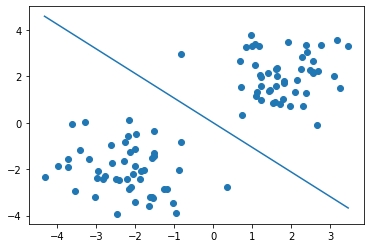

In [24]:
domain = np.linspace(min(X[:,0]), max(X[:,0]), 100)
linearfunction = -w1/w2*domain - b/w2

plt.scatter(X[:,0], X[:,1])
plt.plot(domain,linearfunction)
plt.show()

## Step 5: Make a prediction

Select a random point, for instance (1, -2)

In [26]:
def model_prediction(x,y):
    a = w1 * x + w2 * y + b
    yhat = sigmoid(a)
    if yhat >= 0:
        print("The point (",x,",",y,") is below the line")
    else:
        print("The point (",x,",",y,") is above the line")

In [27]:
model_prediction(1,-2)

The point ( 1 , -2 ) is below the line
